<font size=4 >PREDICTING CAR ACCIDENT SEVERITY</font>

<font color='blue' >1. IMPORT DATA</font>

In [49]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<font color='blue' >2. EXPLORE DATA</font>

In [50]:
df.shape

(194673, 38)

In [51]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

<font color='blue' >3. EXPLORE THE VARIABLES OF INTEREST</font>

Since the capstone case study suggests predicting car accident severity from 'weather' and 'road conditions'; for this project, "environmental variables" will be explored: variables corresponding to external conditions, not related to the driver, passengers or the car itself. 

In [52]:
# Target variable: 'SEVERITYCODE'

df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [53]:
# Environmental variable 1: 'WEATHER'

df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [54]:
# Environmental variable 2: 'LIGHTCOND'

df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [55]:
# Environmental variable 3: 'ROADCOND'

df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [56]:
# Environmental variable 4: 'INCDTTM' (DATE AND TIME)

df['INCDTTM'].value_counts().to_frame()

,INCDTTM
11/2/2006,96
10/3/2008,91
11/5/2005,83
12/4/2004,74
6/1/2006,73
11/4/2006,70
11/4/2005,69
1/5/2007,68
11/6/2006,68
4/8/2006,68


<font color='blue' >4. SELECT RELEVANT VARIABLES</font>

A new dataframe is generated from the environmental variables considered suitable for analysis. All of them were chosen, except for 'INCDTTM' whose values were not registered properly for a categorical analysis. 

In [57]:
df_m = df.loc[:, ['SEVERITYCODE', 'WEATHER', 'LIGHTCOND', 'ROADCOND']]

df_m.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,Overcast,Daylight,Wet
1,1,Raining,Dark - Street Lights On,Wet
2,1,Overcast,Daylight,Dry
3,1,Clear,Daylight,Dry
4,2,Raining,Daylight,Wet


<font color='blue' >5. DROP MISSING VALUES</font>

In [58]:
df_m.isnull().sum()

SEVERITYCODE       0
WEATHER         5081
LIGHTCOND       5170
ROADCOND        5012
dtype: int64

In [59]:
df_m.shape

(194673, 4)

In [60]:
df_m.dropna(axis=0, inplace=True)

In [61]:
df_m.isnull().sum()

SEVERITYCODE    0
WEATHER         0
LIGHTCOND       0
ROADCOND        0
dtype: int64

In [62]:
df_m.shape

(189337, 4)

<font color='blue' >6. CLEAN NON-SPECIFIC DATA</font>

In order to reduce uncertainty from the model, ambiguous categorical labels belonging to the independent variables (such as "unknown", or "other") are dropped.

In [63]:
df_m = df_m.drop(df_m[df_m['WEATHER'] == 'Unknown'].index)

df_m['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111008
Raining,33117
Overcast,27681
Snowing,901
Other,824
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,55
Severe Crosswind,25
Partly Cloudy,5


In [64]:
df_m = df_m.drop(df_m[df_m['WEATHER'] == 'Other'].index)

df_m['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111008
Raining,33117
Overcast,27681
Snowing,901
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,55
Severe Crosswind,25
Partly Cloudy,5


In [65]:
df_m = df_m.drop(df_m[df_m['LIGHTCOND'] == 'Unknown'].index)

df_m['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113225
Dark - Street Lights On,46964
Dusk,5685
Dawn,2429
Dark - No Street Lights,1423
Dark - Street Lights Off,1117
Other,187
Dark - Unknown Lighting,9


In [66]:
df_m = df_m.drop(df_m[df_m['LIGHTCOND'] == 'Other'].index)

df_m['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113225
Dark - Street Lights On,46964
Dusk,5685
Dawn,2429
Dark - No Street Lights,1423
Dark - Street Lights Off,1117
Dark - Unknown Lighting,9


In [67]:
df_m = df_m.drop(df_m[df_m['LIGHTCOND'] == 'Dark - Unknown Lighting'].index)

df_m['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113225
Dark - Street Lights On,46964
Dusk,5685
Dawn,2429
Dark - No Street Lights,1423
Dark - Street Lights Off,1117


In [68]:
df_m = df_m.drop(df_m[df_m['ROADCOND'] == 'Unknown'].index)

df_m['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,121487
Wet,46319
Ice,1080
Snow/Slush,833
Standing Water,105
Other,103
Sand/Mud/Dirt,65
Oil,60


In [69]:
df_m = df_m.drop(df_m[df_m['ROADCOND'] == 'Other'].index)

df_m['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,121487
Wet,46319
Ice,1080
Snow/Slush,833
Standing Water,105
Sand/Mud/Dirt,65
Oil,60


In [70]:
df_m.shape

(169949, 4)

<font color='blue' >7. DESCRIBE THE NEW DATAFRAME</font>

Since the target variable 'SEVERITYCODE' is an ordinal variable that only displays two options (1-property damage; 2-injury), and hence only an absolute value correspoding to one of the options is possible, its type is changed to str.

The resulting dataframe conveys an analysis between categorical variables. 

In [71]:
df_m['SEVERITYCODE'] = df_m['SEVERITYCODE'].astype(str)

In [72]:
df_m.dtypes

SEVERITYCODE    object
WEATHER         object
LIGHTCOND       object
ROADCOND        object
dtype: object

In [73]:
df_m.describe(include="all")

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
count,169949,169949,169949,169949
unique,2,9,6,7
top,1,Clear,Daylight,Dry
freq,114269,108822,112618,121487


<font color='blue' >8. EXPLORE THE RELATIONSHIPS BETWEEN TARGET AND INDEPENDENT VARIABLES</font>

Since the model rests solely on categorical variables, the following methods will be used to explore the relationship between each independent variable and the target variable. 

a) a count plot: to visualize the distribution of data. 

b) a contingency table: to display the percentages of the frequency distribution.

c) a Chi-square test: to obtain metrics about the correlation between the categorical variables. 

In [74]:
%%capture
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [75]:
! pip install  researchpy

import researchpy as rp

In [76]:
# RELATIONSHIP WITH INDEPENDENT VARIABLE 1 'WEATHER'

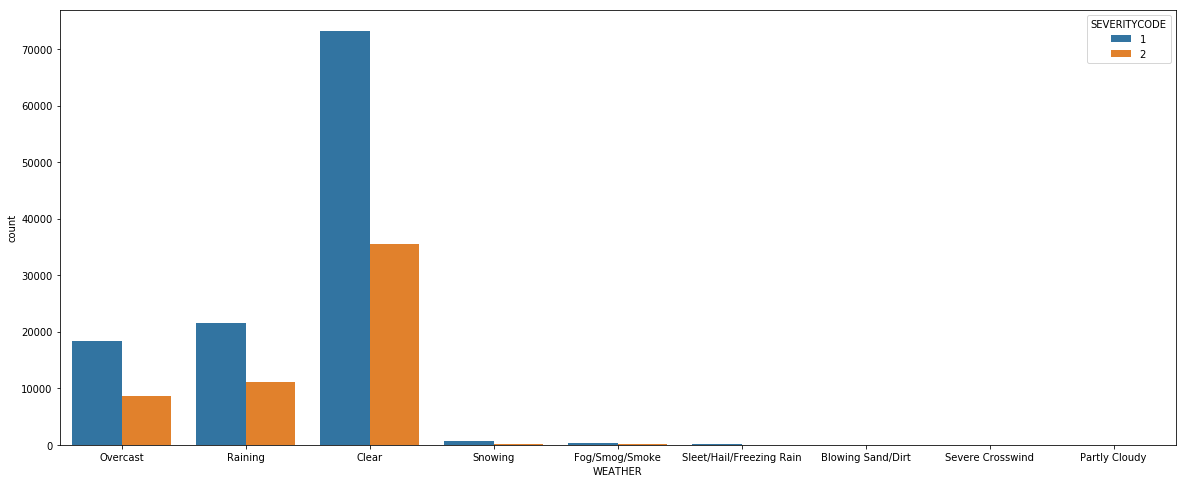

In [77]:
# a) count plot 

fig = plt.gcf()

fig.set_size_inches(20, 8)

graph1 = sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df_m)

In [78]:
#b) contingency table

crosstab1, test_results1 = rp.crosstab(df_m["WEATHER"], df_m["SEVERITYCODE"],
                                               test= "chi-square",
                                               prop= "cell")

crosstab1

SEVERITYCODE               
                                    1      2     All
WEATHER                                             
Blowing Sand/Dirt                0.02   0.01    0.03
Clear                           43.10  20.94   64.03
Fog/Smog/Smoke                   0.22   0.11    0.33
Overcast                        10.77   5.07   15.84
Partly Cloudy                    0.00   0.00    0.00
Raining                         12.69   6.52   19.21
Severe Crosswind                 0.01   0.00    0.01
Sleet/Hail/Freezing Rain         0.05   0.02    0.06
Snowing                          0.39   0.10    0.49
All                             67.24  32.76  100.00

In [79]:
#c) Chi-square test results

test_results1

,Chi-square test,results
0,Pearson Chi-square ( 8.0) =,93.3721
1,p-value =,0.0000
2,Cramer's V =,0.0234


In [80]:
# RELATIONSHIP WITH INDEPENDENT VARIABLE 2 'LIGHTCOND'

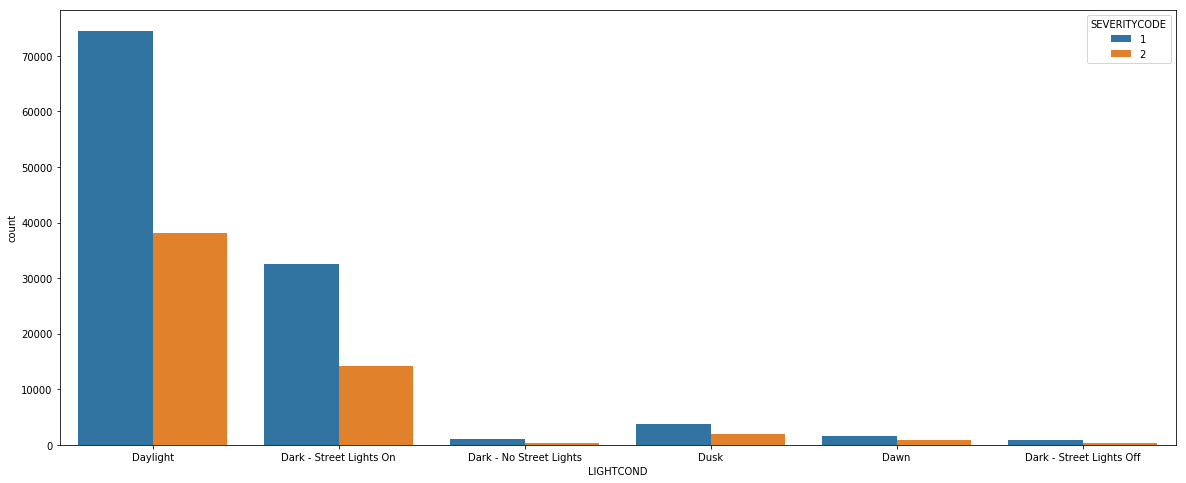

In [81]:
# a) count plot

fig = plt.gcf()

fig.set_size_inches(20, 8)

graph2 = sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df_m)

In [82]:
# b) contingency table

crosstab2, test_results2 = rp.crosstab(df_m["LIGHTCOND"], df_m["SEVERITYCODE"],
                                               test= "chi-square",
                                               prop= "cell")

crosstab2

SEVERITYCODE               
                                    1      2     All
LIGHTCOND                                           
Dark - No Street Lights          0.64   0.19    0.83
Dark - Street Lights Off         0.47   0.18    0.66
Dark - Street Lights On         19.11   8.39   27.51
Dawn                             0.95   0.47    1.42
Daylight                        43.86  22.41   66.27
Dusk                             2.21   1.12    3.32
All                             67.24  32.76  100.00

In [83]:
# c) Chi-square test results

test_results2

,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,241.8456
1,p-value =,0.0000
2,Cramer's V =,0.0377


In [84]:
# RELATIONSHIP WITH INDEPENDENT VARIABLE 3 'ROADCOND'

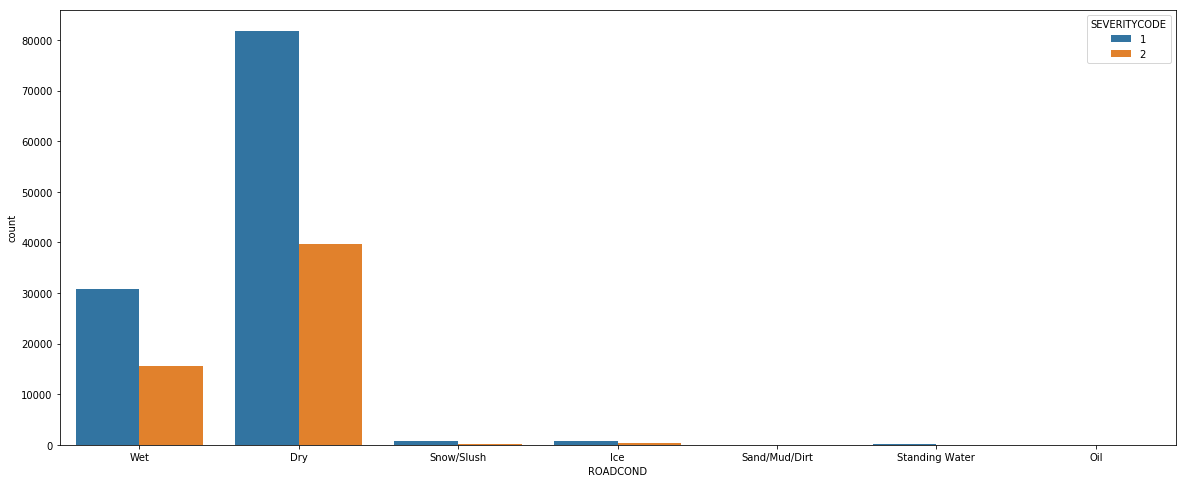

In [85]:
# a) count plot

fig = plt.gcf()

fig.set_size_inches(20, 8)

graph3 = sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df_m)

In [86]:
# b) contingency table

crosstab3, test_results3 = rp.crosstab(df_m["ROADCOND"], df_m["SEVERITYCODE"],
                                               test= "chi-square",
                                               prop= "cell")

crosstab3

SEVERITYCODE               
                          1      2     All
ROADCOND                                  
Dry                   48.15  23.33   71.48
Ice                    0.48   0.15    0.64
Oil                    0.02   0.01    0.04
Sand/Mud/Dirt          0.03   0.01    0.04
Snow/Slush             0.40   0.09    0.49
Standing Water         0.05   0.02    0.06
Wet                   18.12   9.14   27.25
All                   67.24  32.76  100.00

In [87]:
# c) Chi-square test results

test_results3

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,126.8703
1,p-value =,0.0000
2,Cramer's V =,0.0273


<font color='blue' >9. COMMENT ON THE RESULTS</font>

The statistical analysis for the three relationships explored were similar. Here are the results for each of the methods used:

a) All of the independent variables have their data distributed almost entirely on two categories.

b) The percentages reveal, furthermore, that all the independent variables have at least one category that contains at least 60% of the data: for 'WEATHER' it is Clear, for 'LIGHTCOND' it is Daylight, and for 'ROADCOND' Dry. Differences for the severity of car accident occur in these categories, and the second highest frequent category in each variable, but are rendered almost imperceptible for the rest of the labels.   

c) The Chi square revealed some association: the Pearson Chi-square was high and the p-value quite small for the three relationships; however this tends to happen in big datasets such as the one used. The most reliable metric is the Cramer's V, which measures the correlation strength between categorical variables from 0 to 1. All of the relationships reported Cramer's V below 0.05, signaling a very weak relationship.  

<font color='blue' >10. CONCLUSIONS</font>

None of the so-called environmental variables displayed a relationship predicting the severity of a car accident. Hence, environmental conditions are not good predictors of car accident severity. No predictive model can be obtained out of them. 

Car accident severity might, therefore, be connected to human and machine related variables (those having to do with the driver, the passengers, or the car). 